#EMAIL SPAM DETECTION SYSTEM

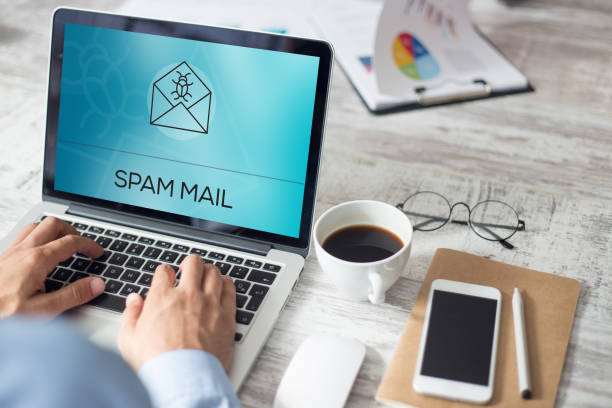

**About the Project and Dataset**

This project focuses on developing an email spam detection system using machine learning techniques, utilizing the SMS Spam Collection dataset with 5,574 English SMS messages categorized as "ham" or "spam". By amalgamating messages from diverse sources, including manual extractions and existing corpora, the dataset enables comprehensive research and model development for email spam detection. Through preprocessing, feature extraction via TF-IDF vectorization, SVM classifier training, evaluation, and hyperparameter tuning, its objective is to effectively discern between spam and legitimate emails, contributing to the advancement of spam detection algorithms.

#Importing the Required Libraries

In [78]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
# Download NLTK resources
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Loading the Dataset

In [2]:
# Load the dataset
data = pd.read_csv("spam.csv", encoding='latin-1')

#Simple Analysis of the Dataset

In [4]:
# Display general information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [5]:
# Display the distribution of 'v1' column (spam/ham)
print("\nDistribution of 'Email Type' column:")
print(data['v1'].value_counts())


Distribution of 'Email Type' column:
v1
ham     4825
spam     747
Name: count, dtype: int64


In [6]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


#Data Cleaning & Preprocessing

In [12]:
# Data Cleaning
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

In [27]:
# Renaming columns
data.rename(columns={'v1': 'Email Type', 'v2': 'Email Text'}, inplace=True)

In [30]:
# Preprocessing and Cleaning
def preprocess_and_clean_data(df):
    # Keep only relevant columns
    df = df[['Email Type', 'Email Text']]
    # Data Cleaning
    df['Email Text'] = df['Email Text'].apply(clean_text)
    return df

# Cleaned dataset
cleaned_data = preprocess_and_clean_data(data)

# Exploratory Data Analysis

In [31]:
# Display statistical summary of the dataset
print("Statistical Summary of the dataset:")
print(cleaned_data.describe())

Statistical Summary of the dataset:
       Email Type Email Text
count        5169       5169
unique          2       5142
top           ham         ok
freq         4516          4


In [32]:
# Display the length of each email text
cleaned_data['Email Length'] = cleaned_data['Email Text'].apply(len)
print("\nLength of each email text:")
print(cleaned_data[['Email Text', 'Email Length']].head())


Length of each email text:
                                          Email Text  Email Length
0  go until jurong point crazy available only in ...           102
1                            ok lar joking wif u oni            23
2  free entry in 2 a wkly comp to win fa cup fina...           149
3        u dun say so early hor u c already then say            43
4  nah i dont think he goes to usf he lives aroun...            59


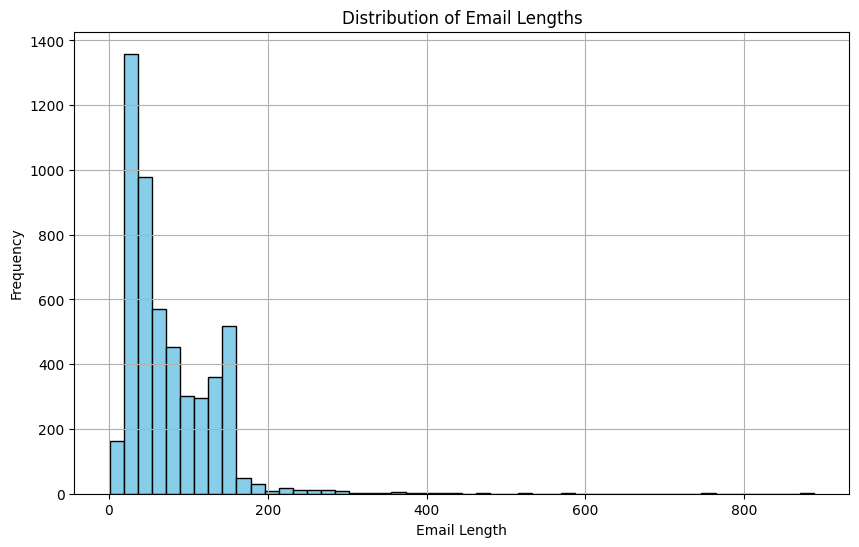

In [33]:
# Visualize the distribution of email lengths
plt.figure(figsize=(10, 6))
plt.hist(cleaned_data['Email Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Text Processing

In [38]:
# Tokenization, Stopword Removal, and Stemming
def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into text
    processed_text = ' '.join(stemmed_tokens)

    return processed_text
# Apply preprocessing to 'Email Text' column
cleaned_data['Processed Text'] = cleaned_data['Email Text'].apply(preprocess_text)

In [39]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['Processed Text'])

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF Matrix:", tfidf_matrix.shape)

Shape of TF-IDF Matrix: (5169, 8061)


# Feature Extraction

In [40]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000,  # Limiting max features for efficiency
                                   ngram_range=(1, 2),  # Include unigrams and bigrams
                                   min_df=5,           # Ignore terms that have a document frequency strictly lower than 5
                                   max_df=0.7,         # Ignore terms that have a document frequency strictly higher than 0.7
                                   stop_words='english')  # Remove English stopwords

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['Processed Text'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF Matrix:", tfidf_matrix.shape)

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print some sample feature names
print("Sample Feature Names:", feature_names[:10])


Shape of TF-IDF Matrix: (5169, 1727)
Sample Feature Names: ['0800' '08000839402' '08000930705' '0870' '08712300220'
 '08712300220 quot' '08712460324' '08718720201' '10' '100']


# Splitting the Dataset into Training and Testing sets

In [41]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, cleaned_data['Email Type'], test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4135, 1727)
Shape of y_train: (4135,)
Shape of X_test: (1034, 1727)
Shape of y_test: (1034,)


#Model Training & Evaluation using Support Vector Machine (SVM) Classifier

In [42]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict the email types (spam/ham) on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9787234042553191

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       889
        spam       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



#Hyperparameter tuning using GridSearchCV

In [59]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'gamma': [0.001, 0.01, 0.1],  # Kernel coefficient
    'kernel': ['linear', 'rbf']   # Kernel type
}

# Initialize the SVM classifier
svm_classifier = SVC(random_state=42)

# Initialize GridSearchCV with the SVM classifier and parameter grid
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to train the final classifier
best_svm_classifier = SVC(**best_params, random_state=42)
best_svm_classifier.fit(X_train, y_train)

# Evaluate the final classifier on the test set
y_pred = best_svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Final Classifier Accuracy:", accuracy)


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.9760582137270194
Final Classifier Accuracy: 0.9777562862669246


# Prediction & Checking the Final Results

In [81]:
# Choose indices corresponding to the emails
email_indices = [0,6,5004,3421]  # Change this to the indices of the emails you want to check

for email_index in email_indices:
    # Get the email text and its actual type (spam/ham) from the dataset
    email_text = cleaned_data.loc[email_index, 'Email Text']
    actual_email_type = cleaned_data.loc[email_index, 'Email Type']

    # Preprocess the email text
    processed_email_text = preprocess_text(email_text)

    # Transform the preprocessed text using the TF-IDF vectorizer
    tfidf_email = tfidf_vectorizer.transform([processed_email_text])

    # Predict the email type (spam/ham) using the trained SVM classifier
    predicted_email_type = svm_classifier.predict(tfidf_email)[0]

    # Output the actual and predicted email types
    print("Email Index:", email_index)
    print("Actual Email Type:", actual_email_type)
    print("Predicted Email Type:", predicted_email_type)
    print()


Email Index: 0
Actual Email Type: ham
Predicted Email Type: ham

Email Index: 6
Actual Email Type: ham
Predicted Email Type: ham

Email Index: 5004
Actual Email Type: ham
Predicted Email Type: ham

Email Index: 3421
Actual Email Type: spam
Predicted Email Type: spam



#Conclusion

*   Developed an email spam detection system achieving an accuracy rate of 97.7%.
*   Preprocessed email data by removing HTML tags, punctuation, and stopwords,
and applying stemming.

*  Utilized TF-IDF vectorization for feature extraction.

*   Trained a Support Vector Machine (SVM) classifier on the preprocessed data.
*   Conducted hyperparameter tuning using GridSearchCV to optimize model performance.

*   Successfully predicted email types (spam or ham) with high accuracy.










